In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium

import osmnx as ox
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
#import geoplot
#import mapclassify
import requests
from bs4 import BeautifulSoup as soup
import nltk
import tweepy
import kaggle
import re


from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
from folium.features import GeoJsonTooltip
from prettymaps import *
from descartes import PolygonPatch
from urllib.parse import urlencode
from mpl_toolkits.basemap import Basemap

# MAT 381E Homework 3

## Question 1

1. Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

2. Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

3. Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

### url func

In [2]:
#url = "https://www.fanatik.com.tr/fifa-dunya-kupasinda-sadece-besiktas-kaldi-2312636"
def news_url(url):
    page = requests.get(url)
    page_soup = soup(page.content, 'html.parser')
    lists = page_soup.find_all('section',class_="text-news-section")
    for list in lists:
        title = list.find('h1',class_="news-detail__info__title").text.replace('\r\n', '')
        summary = list.find('h2',class_="news-detail__info__spot").text.replace('\r\n', '')
        main = list.find("div",class_="news-detail__body__content").text.replace('\r\n', '')
        info = [title,summary,main]
        result = ''.join(info)
    return result 

In [3]:
text_fan = news_url("https://www.fanatik.com.tr/fifa-dunya-kupasinda-sadece-besiktas-kaldi-2312636")
text_fan

"                                    FIFA Dünya Kupası'nda sadece Beşiktaş kaldı!                                                                    Katar’da düzenlenen 2022 FIFA Dünya Kupası’nda Spor Toto Süper Lig’de Beşiktaş'ta oynayan Hollandalı futbolcu Wout Weghorst ve Faslı futbolcu Romain Saiss, çeyrek finalde mücadele etmeye devam edecek.                                \nKatar'da düzenlenen FIFA Dünya Kupası'nda gruplarda Spor Toto Süper Lig'den 19 futbolcu mücadele ederken, Son 16 Turu'nda bu sayı 5'e düşmüştü. Bu tur sonrasında ise kupada, Süper Lig’de  Beşiktaş  forması giyen Wout Weghorst ve Romain Saiss'ın ülkeleri çeyrek finale kaldı.Saiss 4 maçta da oynadıDünya Kupası'nda Fas Milli Takımı'nın vazgeçilmez ismi olan Beşiktaş'ın tecrübeli stoperi Romain Saiss, Süper Lig'de forma giyen oyuncular arasında kupada en çok süre alan oyuncu oldu. Fas Milli Takımı'nın kaptanlığını da yapan Saiss, 3 grup maçında 90 dakika, son turunda İspanya karşısında da 120 dakika sahada kaldı v

### clean func

In [34]:
stop_words = ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya']
def cleanse(abc):
    filtered_text = []
    words = re.sub(r'[^\w\s]','',abc.lower()).split()
    for w in words:
        if w not in stop_words:
            filtered_text.append(w)
    return filtered_text
            

In [13]:
cleaned_text = cleanse(text_fan)
cleaned_text

['fifa',
 'dünya',
 'kupasında',
 'sadece',
 'beşiktaş',
 'kaldı',
 'katarda',
 'düzenlenen',
 '2022',
 'fifa',
 'dünya',
 'kupasında',
 'spor',
 'toto',
 'süper',
 'ligde',
 'beşiktaşta',
 'oynayan',
 'hollandalı',
 'futbolcu',
 'wout',
 'weghorst',
 'faslı',
 'futbolcu',
 'romain',
 'saiss',
 'çeyrek',
 'finalde',
 'mücadele',
 'etmeye',
 'devam',
 'edecek',
 'katarda',
 'düzenlenen',
 'fifa',
 'dünya',
 'kupasında',
 'gruplarda',
 'spor',
 'toto',
 'süper',
 'ligden',
 '19',
 'futbolcu',
 'mücadele',
 'ederken',
 'son',
 '16',
 'turunda',
 'sayı',
 '5e',
 'düşmüştü',
 'tur',
 'sonrasında',
 'kupada',
 'süper',
 'ligde',
 'beşiktaş',
 'forması',
 'giyen',
 'wout',
 'weghorst',
 'romain',
 'saissın',
 'ülkeleri',
 'çeyrek',
 'finale',
 'kaldısaiss',
 '4',
 'maçta',
 'oynadıdünya',
 'kupasında',
 'fas',
 'milli',
 'takımının',
 'vazgeçilmez',
 'ismi',
 'olan',
 'beşiktaşın',
 'tecrübeli',
 'stoperi',
 'romain',
 'saiss',
 'süper',
 'ligde',
 'forma',
 'giyen',
 'oyuncular',
 'arasında'

In [15]:
res = Counter(cleaned_text)
res

Counter({'fifa': 3,
         'dünya': 3,
         'kupasında': 4,
         'sadece': 1,
         'beşiktaş': 2,
         'kaldı': 2,
         'katarda': 2,
         'düzenlenen': 2,
         '2022': 1,
         'spor': 2,
         'toto': 2,
         'süper': 4,
         'ligde': 3,
         'beşiktaşta': 1,
         'oynayan': 1,
         'hollandalı': 1,
         'futbolcu': 3,
         'wout': 5,
         'weghorst': 4,
         'faslı': 1,
         'romain': 3,
         'saiss': 4,
         'çeyrek': 3,
         'finalde': 2,
         'mücadele': 3,
         'etmeye': 1,
         'devam': 1,
         'edecek': 1,
         'gruplarda': 1,
         'ligden': 1,
         '19': 2,
         'ederken': 1,
         'son': 4,
         '16': 3,
         'turunda': 4,
         'sayı': 1,
         '5e': 1,
         'düşmüştü': 1,
         'tur': 1,
         'sonrasında': 1,
         'kupada': 2,
         'forması': 6,
         'giyen': 7,
         'saissın': 1,
         'ülkeleri': 1,
       

In [23]:
def word_cloud(abz):
    plt.figure(figsize=(12,12))
    cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  min_font_size = 10)
    return plt.imshow(cloud.generate(' '.join(abz)))

    



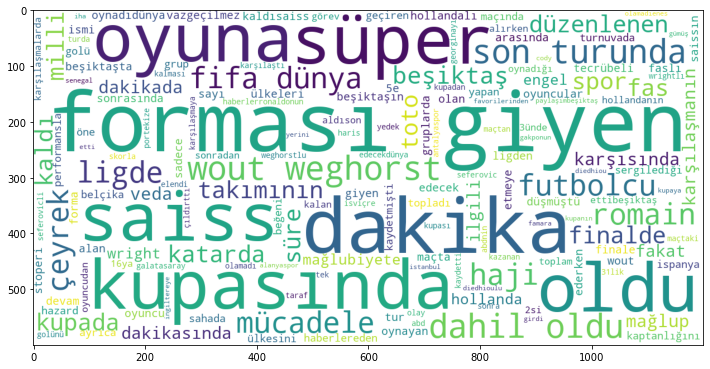

In [24]:
word_cloud(cleaned_text)

In [31]:
obrado_fan = news_url('https://www.fanatik.com.tr/euroleaguede-obradovic-yikildi-2312840')
obrado_fan


'                                    EuroLeague\'de Obradovic yıkıldı!                                                                    THY EuroLeague\'deki tarihi Belgrad derbisinde Zeljko Obradovic\'in yönetimindeki Partizan son saniyelerde Kızılyıldız\'a yıkıldı. Sırp başantrenör mücadele sonrasında açıklamalarda bulundu.\n                                \nTHY EuroLeague 12.hafta mücadelesinde Sırp derbisinde Kızıl Yıldız deplasmanda Partizan’ı son bölümde bulduğu basket ile 76-73 mağlup etti. Sırp başantrenör Zeljko Obradovic mücadele sonrasında açıklamalarda bulundu. İlgili HaberlerDimitris Itoudis\'le Fenerbahçe Beko şov sürüyor! \'Olağanüstü...\'İLK ÇEYREKTE SAVUNMA DAMGASIPartizan savunmasının yaptığı baskı, Kızılyıldız’ı oldukça zorladı ve konuk ekip, ilk 6 dakikada sadece 4 sayı atabildi. İlk periyotta Mathias Lessort, 5’i hücum ribaundu olmak üzere toplamda 8 ribaund alarak boyalı alanda maça damga vurdu. Mücadelenin ilk çeyreğini ev sahibi ekip, 20-11 önde tamamladı.KIZIL

In [35]:
cleaned_obrado = cleanse(obrado_fan)
cleaned_obrado

['euroleaguede',
 'obradovic',
 'yıkıldı',
 'thy',
 'euroleaguedeki',
 'tarihi',
 'belgrad',
 'derbisinde',
 'zeljko',
 'obradovicin',
 'yönetimindeki',
 'partizan',
 'son',
 'saniyelerde',
 'kızılyıldıza',
 'yıkıldı',
 'sırp',
 'başantrenör',
 'mücadele',
 'sonrasında',
 'açıklamalarda',
 'bulundu',
 'thy',
 'euroleague',
 '12hafta',
 'mücadelesinde',
 'sırp',
 'derbisinde',
 'kızıl',
 'yıldız',
 'deplasmanda',
 'partizanı',
 'son',
 'bölümde',
 'bulduğu',
 'basket',
 '7673',
 'mağlup',
 'etti',
 'sırp',
 'başantrenör',
 'zeljko',
 'obradovic',
 'mücadele',
 'sonrasında',
 'açıklamalarda',
 'bulundu',
 'ilgili',
 'haberlerdimitris',
 'itoudisle',
 'fenerbahçe',
 'beko',
 'şov',
 'sürüyor',
 'olağanüstüilk',
 'çeyrekte',
 'savunma',
 'damgasipartizan',
 'savunmasının',
 'yaptığı',
 'baskı',
 'kızılyıldızı',
 'oldukça',
 'zorladı',
 'konuk',
 'ekip',
 'ilk',
 '6',
 'dakikada',
 'sadece',
 '4',
 'sayı',
 'atabildi',
 'ilk',
 'periyotta',
 'mathias',
 'lessort',
 '5i',
 'hücum',
 'ribaund

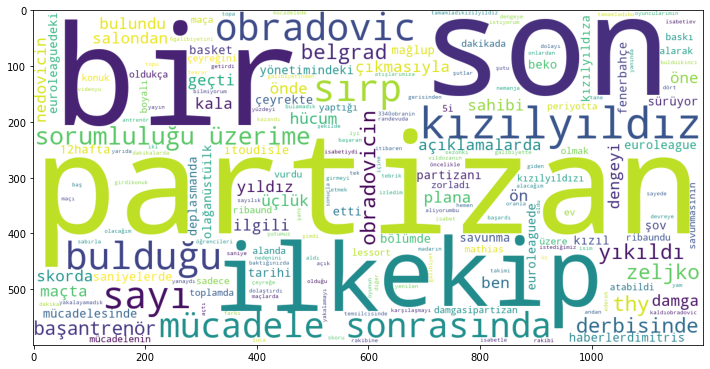

In [37]:
word_cloud(cleaned_obrado)

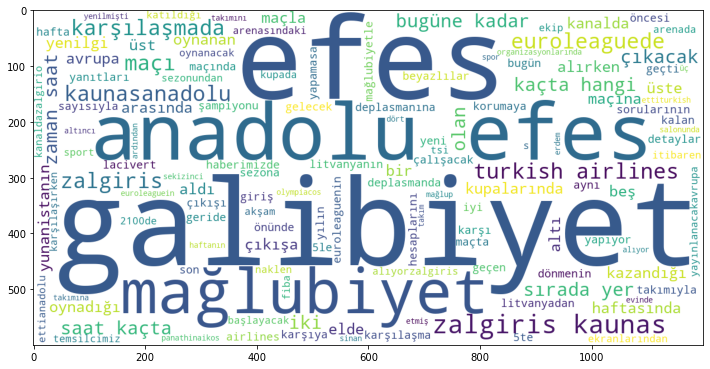

In [40]:
efes = news_url('https://www.fanatik.com.tr/zalgiris-kaunas-anadolu-efes-maci-ne-zaman-saat-kacta-hangi-kanalda-2312863')
cleaned_efes = cleanse(efes)
word_cloud(cleaned_efes)

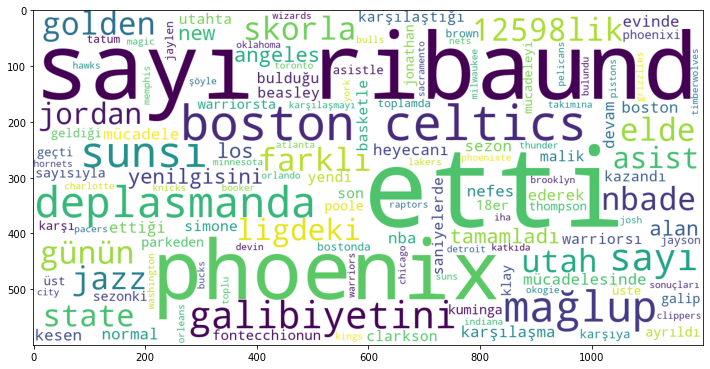

In [42]:
nba = news_url('https://www.fanatik.com.tr/boston-celtics-deplasmanda-phoenix-sunsi-farkli-maglup-etti-2312733')
cleaned_nba = cleanse(nba)
word_cloud(cleaned_nba)

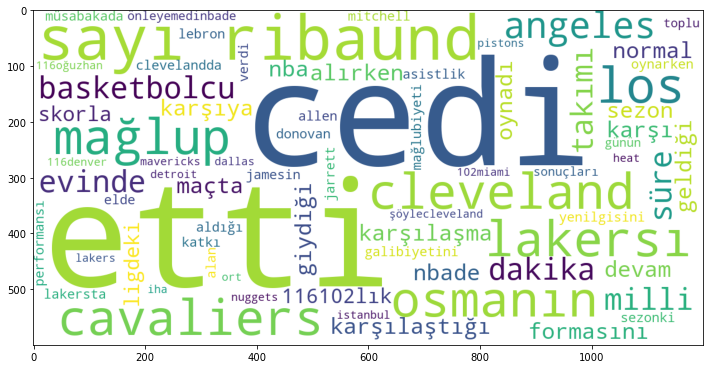

In [43]:
nba_02 = news_url('https://www.fanatik.com.tr/cedi-osmanin-takimi-cleveland-lakersi-maglup-etti-2312618')
cleaned_nba_02 = cleanse(nba_02)
word_cloud(cleaned_nba_02)

## Question 2

1. Using the library [tweepy](https://docs.tweepy.org/en/stable/index.html) pull 5000 tweets (in English) on any topic you'd like.

2. Clean the text and remove all stopwords. Then sketch a word cloud of your collection.

2. Using the library [NLTK](https://www.nltk.org/) apply sentiment analysis on the tweets you collected. 

3. Analyze your results.

## Question 3

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

1. Ingest the dataset as a pandas dataframe, and clean it if necessary.

2. Plot a geographic heatmap of UFO sightings and find hotspots.

3. Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

In [49]:
ufo_data = pd.read_csv('./complete.csv', on_bad_lines='skip')
ufo_data

C:\Users\ozden\AppData\Local\Temp\ipykernel_18400\3724476240.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv('./complete.csv', on_bad_lines='skip')


datetime                  city state country     shape  \
0      10/10/1949 20:30            san marcos    tx      us  cylinder   
1      10/10/1949 21:00          lackland afb    tx     NaN     light   
2      10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3      10/10/1956 21:00                  edna    tx      us    circle   
4      10/10/1960 20:00               kaneohe    hi      us     light   
...                 ...                   ...   ...     ...       ...   
88674    9/9/2013 22:00                  napa    ca      us     other   
88675    9/9/2013 22:20                vienna    va      us    circle   
88676    9/9/2013 23:00                edmond    ok      us     cigar   
88677    9/9/2013 23:00                 starr    sc      us   diamond   
88678    9/9/2013 23:30        ft. lauderdale    fl      us      oval   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
1                   7200              1-2 hrs   
2                     20           20 seconds   
3                     20             1/2 hour   
4                    900           15 minutes   
...                  ...                  ...   
88674             1200.0                 hour   
88675                5.0            5 seconds   
88676             1020.0           17 minutes   
88677                0.0             2 nights   
88678                0.0       still occuring   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
88674                                       Napa UFO&#44   9/30/2013   
88675  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
88676  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   
88677  On September ninth my wife and i noticed stran...   9/30/2013   
88678  Hovering object lit with red and white lights&...   9/30/2013   

         latitude   longitude  
0      29.8830556  -97.941111  
1        29.38421  -98.581082  
2            53.2   -2.916667  
3      28.9783333  -96.645833  
4      21.4180556 -157.803611  
...           ...         ...  
88674   38.297222 -122.284444  
88675   38.901111  -77.265556  
88676   35.652778  -97.477778  
88677   34.376944  -82.695833  
88678   26.121944  -80.143611  

[88679 rows x 11 columns]

In [100]:
ufo_data["duration (seconds)"] = ufo_data["duration (seconds)"].astype(int)

ValueError: invalid literal for int() with base 10: '0.0'

In [95]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88673 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88673 non-null  object 
 1   city                  88673 non-null  object 
 2   state                 81266 non-null  object 
 3   country               76311 non-null  object 
 4   shape                 85753 non-null  object 
 5   duration (seconds)    88673 non-null  object 
 6   duration (hours/min)  85654 non-null  object 
 7   comments              88638 non-null  object 
 8   date posted           88673 non-null  object 
 9   latitude              88673 non-null  float64
 10  longitude             88673 non-null  float64
dtypes: float64(2), object(9)
memory usage: 8.1+ MB


In [96]:
ufo_data.groupby('shape')['duration (seconds)'].mean()

TypeError: can only concatenate str (not "float") to str

In [93]:
ufo_data = ufo_data[pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce').notnull()]

In [62]:
ufo_data = ufo_data[pd.to_numeric(ufo_data['latitude'], errors='coerce').notnull()]

In [64]:
ufo_data['latitude'] = ufo_data['latitude'].astype(float)

C:\Users\ozden\AppData\Local\Temp\ipykernel_18400\2521345682.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88678 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88678 non-null  object 
 1   city                  88678 non-null  object 
 2   state                 81269 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85756 non-null  object 
 5   duration (seconds)    88676 non-null  object 
 6   duration (hours/min)  85659 non-null  object 
 7   comments              88643 non-null  object 
 8   date posted           88678 non-null  object 
 9   latitude              88678 non-null  float64
 10  longitude             88678 non-null  float64
dtypes: float64(2), object(9)
memory usage: 8.1+ MB


In [88]:
fig = px.density_mapbox(ufo_data, 
                        lat='latitude', lon='longitude',z='duration (seconds)',
                        width=1200,height=400,
                        zoom=2,
                        mapbox_style="stamen-terrain",
                        radius=2)
fig

## Question 4

For this question use [Turkish Institute of Statistics (TÜİK)](https://data.tuik.gov.tr/) data portal, and [The Humanitarian Data Exchange (HDX)](https://www.eea.europa.eu/data-and-maps/data/) data portal.

1. Get the population data for cities in Turkey as a pandas data frame from TUIK. Notice that TUIK generates the data only for human consumption. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done using python only. You are NOT allowed to clean it externally.

2. Get the crime statistics (Suçun İşlendiği İl ve Suç Türüne Göre Ceza İnfaz Kurumundan Çıkan Hükümlüler) as a pandas data frame from TUIK. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done python only. You are NOT allowed to clean it externally.

3. Get the shape files for the Turkish city municipality borders from HDX, ingest it as a geoPandas datafroma, and then clean it if necessary. Cleaning must be done using python only. You are NOT allowed to clean it externally.

4. Merge the population data, crime data, and the shapefile data into a single geoPandas dataframe.

5. Plot the population data as a choropleth map as I did in the class.

6. Plot the crime data for different categories. However, don't use the raw numbers. Use the normalized data with respect to the population of the city.

In [134]:
popul = pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=/vtxiTKFBPPQlHnyc/wI72tJn4gqwBgmygoKP3Q89zZWU8E6Hyfi03q5kxPWi8zq')
popul

Yıllara göre il nüfusları, 2000-2021  \
0         Population of provinces by years, 2000-2021   
1                                       İl\nProvinces   
2                                                 NaN   
3                                        Toplam-Total   
4                                               Adana   
..                                                ...   
88  (1) End of the year populations for the 2000-2...   
89  (2) Rakamlar yuvarlamadan dolayı toplamı verme...   
90  (2) Total numbers may not give the exact total...   
91      (3) 2007-2021 dönemi için ADNKS sonuçlarıdır.   
92        (3) ABPRS results for the period 2007-2021.   

                                   Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                                         NaN         NaN         NaN   
1   Nüfus tahmini\nPopulation estimate(1) (2)         NaN         NaN   
2                                        2000      2001.0      2002.0   
3                                    64729501  65603160.0  66401851.0   
4                                     1879695   1899324.0   1916637.0   
..                                        ...         ...         ...   
88                                        NaN         NaN         NaN   
89                                        NaN         NaN         NaN   
90                                        NaN         NaN         NaN   
91                                        NaN         NaN         NaN   
92                                        NaN         NaN         NaN   

    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
0          NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN   
2       2003.0      2004.0      2005.0      2006.0   
3   67187251.0  68010215.0  68860539.0  69729967.0   
4    1933428.0   1951142.0   1969512.0   1988277.0   
..         ...         ...         ...         ...   
88         NaN         NaN         NaN         NaN   
89         NaN         NaN         NaN         NaN   
90         NaN         NaN         NaN         NaN   
91         NaN         NaN         NaN         NaN   
92         NaN         NaN         NaN         NaN   

                                           Unnamed: 8  Unnamed: 9  ...  \
0                                                 NaN         NaN  ...   
1   Adrese Dayalı Nüfus Kayıt Sistemi \nAddress Ba...         NaN  ...   
2                                                2007      2008.0  ...   
3                                            70586256  71517100.0  ...   
4                                             2006650   2026319.0  ...   
..                                                ...         ...  ...   
88                                                NaN         NaN  ...   
89                                                NaN         NaN  ...   
90                                                NaN         NaN  ...   
91                                                NaN         NaN  ...   
92                                                NaN         NaN  ...   

    Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0           NaN          NaN          NaN   
1           NaN          NaN          NaN   
2        2012.0       2013.0       2014.0   
3    75627384.0   76667864.0   77695904.0   
4     2125635.0    2149260.0    2165595.0   
..          ...          ...          ...   
88          NaN          NaN          NaN   
89          NaN          NaN          NaN   
90          NaN          NaN          NaN   
91          NaN          NaN          NaN   
92          NaN          NaN          NaN   

                                          Unnamed: 16  Unnamed: 17  \
0                                                 NaN          NaN   
1   Adrese Dayalı Nüfus Kayıt Sistemi \nAddress Ba...          NaN   
2                                                2015       2016.0   
3                                            78741053   79814871.0   
4                         

In [135]:
popul.tail(15)

Yıllara göre il nüfusları, 2000-2021 Unnamed: 1  Unnamed: 2  \
78                                            Ardahan     122409    121305.0   
79                                              Iğdır     174285    175550.0   
80                                             Yalova     144923    150027.0   
81                                            Karabük     205172    207241.0   
82                                              Kilis     109698    111024.0   
83                                           Osmaniye     411163    417418.0   
84                                              Düzce     296712    300686.0   
85  Kaynak: TÜİK nüfus tahminleri, 2000-2006, Adre...        NaN         NaN   
86  Source: TurkStat, Population Estimates, 2000-2...        NaN         NaN   
87  (1) 2000-2006 dönemi yıl sonu nüfusları, ADNKS...        NaN         NaN   
88  (1) End of the year populations for the 2000-2...        NaN         NaN   
89  (2) Rakamlar yuvarlamadan dolayı toplamı verme...        NaN         NaN   
90  (2) Total numbers may not give the exact total...        NaN         NaN   
91      (3) 2007-2021 dönemi için ADNKS sonuçlarıdır.        NaN         NaN   
92        (3) ABPRS results for the period 2007-2021.        NaN         NaN   

    Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7 Unnamed: 8  \
78    119993.0    118590.0    117178.0    115750.0    114283.0     112721   
79    176588.0    177563.0    178609.0    179701.0    180815.0     181866   
80    155041.0    160099.0    165333.0    170705.0    176207.0     181758   
81    209056.0    210812.0    212667.0    214591.0    216557.0     218463   
82    112219.0    113387.0    114615.0    115886.0    117185.0     118457   
83    423214.0    428943.0    434930.0    441108.0    447428.0     452880   
84    304316.0    307884.0    311623.0    315487.0    319438.0     323328   
85         NaN         NaN         NaN         NaN         NaN        NaN   
86         NaN         NaN         NaN         NaN         NaN        NaN   
87         NaN         NaN         NaN         NaN         NaN        NaN   
88         NaN         NaN         NaN         NaN         NaN        NaN   
89         NaN         NaN         NaN         NaN         NaN        NaN   
90         NaN         NaN         NaN         NaN         NaN        NaN   
91         NaN         NaN         NaN         NaN         NaN        NaN   
92         NaN         NaN         NaN         NaN         NaN        NaN   

    Unnamed: 9  ...  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
78    112242.0  ...     106643.0     102782.0     100809.0        99265   
79    184025.0  ...     190409.0     190424.0     192056.0       192435   
80    197412.0  ...     211799.0     220122.0     226514.0       233009   
81    216248.0  ...     225145.0     230251.0     231333.0       236978   
82    120991.0  ...     124320.0     128586.0     128781.0       130655   
83    464704.0  ...     492135.0     498981.0     506807.0       512873   
84    328611.0  ...     346493.0     351509.0     355549.0       360388   
85         NaN  ...          NaN          NaN          NaN          NaN   
86         NaN  ...          NaN          NaN          NaN          NaN   
87         NaN  ...          NaN          NaN          NaN          NaN   
88         NaN  ...          NaN          NaN          NaN          NaN   
89         NaN  ...          NaN          NaN          NaN          NaN   
90         NaN  ...          NaN          NaN          NaN          NaN   
91         NaN  ...          NaN          NaN          NaN          NaN   
92         NaN  ...          NaN          NaN          NaN          NaN   

    Unnamed: 17  Unnamed: 18 Unnamed: 19  Unnamed: 20  Unnamed: 21  \
78      98335.0      97096.0     98907.0      97319.0      96161.0   
79     192785.0     194775.0    197456.0     199442.0     201314.0   
80     241665.0     251203.0    262234.0     270976.0     276050.0   
81     242347.0     24

In [137]:
popul = popul.drop(labels=range(0,2),axis=0)
#popul = popul.drop(labels=range(85,93),axis=0)
#popul = popul.drop(labels=92,axis=0)
popul.reset_index(drop=True,inplace=True)
popul

Yıllara göre il nüfusları, 2000-2021 Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                                   NaN       2000      2001.0      2002.0   
1                          Toplam-Total   64729501  65603160.0  66401851.0   
2                                 Adana    1879695   1899324.0   1916637.0   
3                              Adıyaman     568432    571180.0    573149.0   
4                        Afyonkarahisar     696292    698029.0    698773.0   
..                                  ...        ...         ...         ...   
78                               Yalova     144923    150027.0    155041.0   
79                              Karabük     205172    207241.0    209056.0   
80                                Kilis     109698    111024.0    112219.0   
81                             Osmaniye     411163    417418.0    423214.0   
82                                Düzce     296712    300686.0    304316.0   

    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7 Unnamed: 8  Unnamed: 9  \
0       2003.0      2004.0      2005.0      2006.0       2007      2008.0   
1   67187251.0  68010215.0  68860539.0  69729967.0   70586256  71517100.0   
2    1933428.0   1951142.0   1969512.0   1988277.0    2006650   2026319.0   
3     574886.0    576808.0    578852.0    580926.0     582762    585067.0   
4     699193.0    699794.0    700502.0    701204.0     701572    697365.0   
..         ...         ...         ...         ...        ...         ...   
78    160099.0    165333.0    170705.0    176207.0     181758    197412.0   
79    210812.0    212667.0    214591.0    216557.0     218463    216248.0   
80    113387.0    114615.0    115886.0    117185.0     118457    120991.0   
81    428943.0    434930.0    441108.0    447428.0     452880    464704.0   
82    307884.0    311623.0    315487.0    319438.0     323328    328611.0   

    ...  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0   ...       2012.0       2013.0       2014.0         2015       2016.0   
1   ...   75627384.0   76667864.0   77695904.0     78741053   79814871.0   
2   ...    2125635.0    2149260.0    2165595.0      2183167    2201670.0   
3   ...     595261.0     597184.0     597835.0       602774     610484.0   
4   ...     703948.0     707123.0     706371.0       709015     714523.0   
..  ...          ...          ...          ...          ...          ...   
78  ...     211799.0     220122.0     226514.0       233009     241665.0   
79  ...     225145.0     230251.0     231333.0       236978     242347.0   
80  ...     124320.0     128586.0     128781.0       130655     130825.0   
81  ...     492135.0     498981.0     506807.0       512873     522175.0   
82  ...     346493.0     351509.0     355549.0       360388     370371.0   

    Unnamed: 18 Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  
0        2017.0      2018.0       2019.0       2020.0       2021.0  
1    80810525.0  82003882.0   83154997.0   83614362.0   84680273.0  
2     2216475.0   2220125.0    2237940.0    2258718.0    2263373.0  
3      615076.0    624513.0     626465.0     632459.0     632148.0  
4      715693.0    725568.0     729483.0     736912.0     744179.0  
..          ...         ...          ...          ...          ...  
78     251203.0    262234.0     270976.0     276050.0     291001.0  
79     244453.0    248014.0     248458.0     243614.0     249287.0  
80     136319.0    142541.0     142490.0     142792.0     145826.0  
81     527724.0    534415.0     538759.0     548556.0     553012.0  
82     377610.0    387844.0     392166.0     395679.0     400976.0  

[83 rows x 23 columns]

In [139]:
#popul.columns = popul.iloc[0]
popul = popul.drop(labels=0,axis=0)
popul

0           NaN       2000.0      2001.0      2002.0      2003.0      2004.0  \
1     Toplam-Total  64729501  65603160.0  66401851.0  67187251.0  68010215.0   
2            Adana   1879695   1899324.0   1916637.0   1933428.0   1951142.0   
3         Adıyaman    568432    571180.0    573149.0    574886.0    576808.0   
4   Afyonkarahisar    696292    698029.0    698773.0    699193.0    699794.0   
5             Ağrı    519190    521514.0    523123.0    524514.0    526070.0   
..             ...       ...         ...         ...         ...         ...   
78          Yalova    144923    150027.0    155041.0    160099.0    165333.0   
79         Karabük    205172    207241.0    209056.0    210812.0    212667.0   
80           Kilis    109698    111024.0    112219.0    113387.0    114615.0   
81        Osmaniye    411163    417418.0    423214.0    428943.0    434930.0   
82           Düzce    296712    300686.0    304316.0    307884.0    311623.0   

0       2005.0      2006.0    2007.0      2008.0  ...      2012.0      2013.0  \
1   68860539.0  69729967.0  70586256  71517100.0  ...  75627384.0  76667864.0   
2    1969512.0   1988277.0   2006650   2026319.0  ...   2125635.0   2149260.0   
3     578852.0    580926.0    582762    585067.0  ...    595261.0    597184.0   
4     700502.0    701204.0    701572    697365.0  ...    703948.0    707123.0   
5     527732.0    529417.0    530879    532180.0  ...    552404.0    551177.0   
..         ...         ...       ...         ...  ...         ...         ...   
78    170705.0    176207.0    181758    197412.0  ...    211799.0    220122.0   
79    214591.0    216557.0    218463    216248.0  ...    225145.0    230251.0   
80    115886.0    117185.0    118457    120991.0  ...    124320.0    128586.0   
81    441108.0    447428.0    452880    464704.0  ...    492135.0    498981.0   
82    315487.0    319438.0    323328    328611.0  ...    346493.0    351509.0   

0       2014.0    2015.0      2016.0      2017.0      2018.0      2019.0  \
1   77695904.0  78741053  79814871.0  80810525.0  82003882.0  83154997.0   
2    2165595.0   2183167   2201670.0   2216475.0   2220125.0   2237940.0   
3     597835.0    602774    610484.0    615076.0    624513.0    626465.0   
4     706371.0    709015    714523.0    715693.0    725568.0    729483.0   
5     549435.0    547210    542255.0    536285.0    539657.0    536199.0   
..         ...       ...         ...         ...         ...         ...   
78    226514.0    233009    241665.0    251203.0    262234.0    270976.0   
79    231333.0    236978    242347.0    244453.0    248014.0    248458.0   
80    128781.0    130655    130825.0    136319.0    142541.0    142490.0   
81    506807.0    512873    522175.0    527724.0    534415.0    538759.0   
82    355549.0    360388    370371.0    377610.0    387844.0    392166.0   

0       2020.0      2021.0  
1   83614362.0  84680273.0  
2    2258718.0   2263373.0  
3     632459.0    632148.0  
4     736912.0    744179.0  
5     535435.0    524644.0  
..         ...         ...  
78    276050.0    291001.0  
79    243614.0    249287.0  
80    142792.0    145826.0  
81    548556.0    553012.0  
82    395679.0    400976.0  

[82 rows x 23 columns]

In [144]:
ceza_df = pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=LSFI4zLRNiJ02FNXvJWWr2U867NjzeFrwwCeCvVidrUAkhJOsSDmTzgvY385934q',
                        header=11)
ceza_df

İBBS 3. Düzey  Unnamed: 1  \
0                                  (Suçun işlendiği il)        NaN   
1                                                   NaN        NaN   
2                                                  2020        NaN   
3                                                   NaN        NaN   
4                                                    TR    Türkiye   
...                                                 ...        ...   
3333                                                NaN        NaN   
3334  Kaynaklar: Ceza İnfaz Kurumu İstatistikleri 20...        NaN   
3335               Sources: Prison Statistics 2011-2020        NaN   
3336                                    - Bilgi yoktur.        NaN   
3337                          - Denotes magnitude null.        NaN   

          Unnamed: 2  Toplam   Öldürme Yaralama  Sexual       kılma  \
0                NaN   Total  Homicide  Assault  crimes  Kidnapping   
1                NaN     NaN       NaN      NaN     NaN         NaN   
2                NaN     NaN       NaN      NaN     NaN         NaN   
3                NaN     NaN       NaN      NaN     NaN         NaN   
4     Toplam - Total  361870      5945    57713    4899        6500   
...              ...     ...       ...      ...     ...         ...   
3333  Kadın - Female     101         -        7       2           2   
3334             NaN     NaN       NaN      NaN     NaN         NaN   
3335             NaN     NaN       NaN      NaN     NaN         NaN   
3336             NaN     NaN       NaN      NaN     NaN         NaN   
3337             NaN     NaN       NaN      NaN     NaN         NaN   

         Hakaret Hırsızlık  ... Forestry    firearms Enforcement Criminal  \
0     Defamation     Theft  ...   crimes  and knifes         Law      Law   
1            NaN       NaN  ...      NaN         NaN         NaN      NaN   
2            NaN       NaN  ...      NaN         NaN         NaN      NaN   
3            NaN       NaN  ...      NaN         NaN         NaN      NaN   
4           6638     76698  ...      758       11896       11917     6640   
...          ...       ...  ...      ...         ...         ...      ...   
3333           2         8  ...       25         NaN         NaN      NaN   
3334         NaN       NaN  ...      NaN         NaN         NaN      NaN   
3335         NaN       NaN  ...      NaN         NaN         NaN      NaN   
3336         NaN       NaN  ...      NaN         NaN         NaN      NaN   
3337         NaN       NaN  ...      NaN         NaN         NaN      NaN   

      Tehdit        to           of  for family   Other Bilinmeyen  
0     Threat  property  performance  protection  crimes    Unknown  
1        NaN       NaN          NaN         NaN     NaN        NaN  
2        NaN       NaN          NaN         NaN     NaN        NaN  
3        NaN       NaN          NaN         NaN     NaN        NaN  
4      11908      3327         7074        6438   55840        189  
...      ...       ...          ...         ...     ...        ...  
3333     NaN       NaN          NaN         NaN     NaN        NaN  
3334     NaN       NaN          NaN         NaN     NaN        NaN  
3335     NaN       NaN          NaN         NaN     NaN        NaN  
3336     NaN       NaN          NaN         NaN     NaN        NaN  
3337     NaN       NaN          NaN         NaN     NaN        NaN  

[3338 rows x 30 columns]

In [145]:
ceza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   İBBS 3. Düzey   1077 non-null   object
 1   Unnamed: 1      830 non-null    object
 2   Unnamed: 2      1671 non-null   object
 3   Toplam          1844 non-null   object
 4   Öldürme         1785 non-null   object
 5   Yaralama        1785 non-null   object
 6   Sexual          1903 non-null   object
 7   kılma           2021 non-null   object
 8   Hakaret         1785 non-null   object
 9   Hırsızlık       1785 non-null   object
 10  Yağma           1785 non-null   object
 11  Dolandırıcılık  1833 non-null   object
 12  commerce        2217 non-null   object
 13  purchase        2313 non-null   object
 14  Sahtecilik      1881 non-null   object
 15  Bad             1831 non-null   object
 16  Embezzle-       1856 non-null   object
 17  Rüşvet          1977 non-null   object
 18  Kaçakçıl

In [146]:
ceza_df["Unnamed: 1"].iloc[17]

'Kırklareli '

In [147]:
ceza_df = ceza_df.drop(labels=range(0,3),axis=0)


In [148]:
ceza_df

İBBS 3. Düzey  Unnamed: 1  \
3                                                   NaN        NaN   
4                                                    TR    Türkiye   
5                                                   NaN        NaN   
6                                                   NaN        NaN   
7                                                   NaN        NaN   
...                                                 ...        ...   
3333                                                NaN        NaN   
3334  Kaynaklar: Ceza İnfaz Kurumu İstatistikleri 20...        NaN   
3335               Sources: Prison Statistics 2011-2020        NaN   
3336                                    - Bilgi yoktur.        NaN   
3337                          - Denotes magnitude null.        NaN   

          Unnamed: 2  Toplam Öldürme Yaralama Sexual kılma Hakaret Hırsızlık  \
3                NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   
4     Toplam - Total  361870    5945    57713   4899  6500    6638     76698   
5       Erkek - Male  348873    5815    56430   4856  6311    6358     72402   
6     Kadın - Female   12997     130     1283     43   189     280      4296   
7                NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   
...              ...     ...     ...      ...    ...   ...     ...       ...   
3333  Kadın - Female     101       -        7      2     2       2         8   
3334             NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   
3335             NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   
3336             NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   
3337             NaN     NaN     NaN      NaN    NaN   NaN     NaN       NaN   

      ... Forestry firearms Enforcement Criminal Tehdit    to    of  \
3     ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   
4     ...      758    11896       11917     6640  11908  3327  7074   
5     ...      736    11791       11361     6640  11555  3192  6897   
6     ...       22      105         556        -    353   135   177   
7     ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   
...   ...      ...      ...         ...      ...    ...   ...   ...   
3333  ...       25      NaN         NaN      NaN    NaN   NaN   NaN   
3334  ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   
3335  ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   
3336  ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   
3337  ...      NaN      NaN         NaN      NaN    NaN   NaN   NaN   

     for family  Other Bilinmeyen  
3           NaN    NaN        NaN  
4          6438  55840        189  
5          6305  53335        187  
6           133   2505          2  
7           NaN    NaN        NaN  
...         ...    ...        ...  
3333        NaN    NaN        NaN  
3334        NaN    NaN        NaN  
3335        NaN    NaN        NaN  
3336        NaN    NaN        NaN  
3337        NaN    NaN        NaN  

[3335 rows x 30 columns]

2 ve 3. sorulardaki api'lar ile uğraşıp vakit kaybettim gerisini yetiştiremedim